## Welcome to this mini project on web scraping and text analysis

#### We first import the main libraries that we are going to need

In [1]:
## TinyDB! is the document database storage we use to store the scraped data. 
import tinydb
from tinydb import TinyDB, Query

## Scrapy is our tool for web scraping
import scrapy

## Pandas is the main tool for handling data
import pandas as pd

## NumPy is the lower level numerical computation package
import numpy as np

## MatPlotLib is used for all the plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt
## the styles change the way plots look like. Check for the rest of available styles
plt.style.use('ggplot')

## NLTK is the main tool to process textual data
import nltk

## regex operations are important in filtering text
import re


## SciPy has the implementation of the algorithms we want for our modelling
import scipy as sc

## We want to ignore warnings for the time being
import warnings
warnings.filterwarnings('ignore')


In [2]:

from platform import python_version
print (
    'software used and its version',
    '\n  Python', python_version(),
    '\n  Scrapy', scrapy.__version__,
    '\n  tinydb', tinydb.__version__,
    '\n  pandas', pd.__version__,
    '\n  numpy', np.__version__,
    '\n  matplotlib', mpl.__version__,
    '\n  nltk', nltk.__version__,
    '\n  scipy', sc.__version__,
    
)

software used and its version 
  Python 3.7.3 
  Scrapy 1.6.0 
  tinydb 3.14.1 
  pandas 0.24.2 
  numpy 1.16.2 
  matplotlib 3.0.3 
  nltk 3.4 
  scipy 1.2.1


In [3]:
## Let us take a quick look at our spiders
## With %%bash we get access to a virtual bash terminal, 
## and we get access to everything on the file system
## With cat we can take a look inside our spider

In [4]:
%%bash
cd wikipedia1/scraping_wikipedia/spiders
cat my_wikipedia_spider.py

import scrapy
from ..items import ScrapingWikipediaItem

class ScrapingWikipedia(scrapy.Spider):
    name = 'my_wikipedia'
    start_urls = ['https://en.wikipedia.org/wiki/List_of_companies_of_Italy']
    # name and start_url are expected by scrapy.Spider and should not be changed

    def parse(self, response):

        
        items = ScrapingWikipediaItem()
        
        ## the table we want is the second in the whole page
        ## the table contains tr elements - table rows
        table = response.xpath("//table[2]").css("tr")
        
        
        ## we filter out the first row that contains the header
        for row in table[1:]: 
            ## we iterate over the rows, and pick the elements we want,
            ## we put them in a list, and send them to the database
            list_to_insert = []

            ## the name
            list_to_insert.append(row.xpath("td[1]//text()").get() )

            ## the wiki url
            list_to_insert.append( "https://en.w

#### In this section we finalise the construction of the dataset we want 

In [5]:
## The connections to the two databases

wikipedia1_db = TinyDB('wikipedia1_db.json', sort_keys=True, 
            indent=4, separators=(',', ': '))

wikipedia2_db = TinyDB('wikipedia2_db.json', sort_keys=True, 
            indent=4, separators=(',', ': '))

In [6]:
## db.all() return a list with all the documents. 
## With the subscript [0] we get the first one

## Our spider returned a list with all the data 
## for every row in the table of companies

wikipedia1_db.all()[0]

{'company_name': '55DSL',
 'foundation_year': '1994',
 'headquarters': 'Marostica',
 'industry': 'Consumer goods',
 'row': ['55DSL',
  'https://en.wikipedia.org/wiki/55DSL',
  'Consumer goods',
  'Clothing & accessories',
  'Marostica',
  '1994'],
 'sector': 'Clothing & accessories',
 'text': '55DSL is a company founded in Italy as a 1994 spinoff from Diesel Clothing that sells male and female clothing in stores all around the world, including in the brand\'s own proprietary stores. In the beginning 55DSL was an experimental line for Diesel. Its first collection was called \'FW94, Subzero Winter\' - a male collection consisting of 55 pieces in total. After 5 years operating under Diesel, the brand became an independent business unit, and moved from Italy to Balerna, Switzerland. Here it stayed for six years (until 2005), when it moved back again to Italy. The 55DSL brand was also the featured apparel of the characters in EA Sports Need for Speed: Carbon. The current Creative Director o

In [7]:
## We would like to split the list and assign each element to a key;
## in this way we can easily access each attribute

for doc in wikipedia1_db:
    
    to_update = { 
        'company_name' :  doc['row'][0],
        
        'wikipedia_url' :  ( doc['row'][1]),
        
        'industry' :  doc['row'][2],
        
        'sector' :  doc['row'][3],
        
        'headquarters' :  doc['row'][4],
        
        'foundation_year' :  doc['row'][5],
        
    }
    
    wikipedia1_db.update(to_update, doc_ids=[doc.doc_id])


In [8]:
## We see that the documents have changed.
## ebfore we had only one key - 'row', while now we have many more.

wikipedia1_db.all()[0]

{'company_name': '55DSL',
 'foundation_year': '1994',
 'headquarters': 'Marostica',
 'industry': 'Consumer goods',
 'row': ['55DSL',
  'https://en.wikipedia.org/wiki/55DSL',
  'Consumer goods',
  'Clothing & accessories',
  'Marostica',
  '1994'],
 'sector': 'Clothing & accessories',
 'text': '55DSL is a company founded in Italy as a 1994 spinoff from Diesel Clothing that sells male and female clothing in stores all around the world, including in the brand\'s own proprietary stores. In the beginning 55DSL was an experimental line for Diesel. Its first collection was called \'FW94, Subzero Winter\' - a male collection consisting of 55 pieces in total. After 5 years operating under Diesel, the brand became an independent business unit, and moved from Italy to Balerna, Switzerland. Here it stayed for six years (until 2005), when it moved back again to Italy. The 55DSL brand was also the featured apparel of the characters in EA Sports Need for Speed: Carbon. The current Creative Director o

In [9]:
# What did spider2 brought along? The url and the corresponding text

wikipedia2_db.all()[0]

{'complete_text': ['https://en.wikipedia.org/wiki/55DSL',
  '55DSL is a company founded in Italy as a 1994 spinoff from Diesel Clothing that sells male and female clothing in stores all around the world, including in the brand\'s own proprietary stores. In the beginning 55DSL was an experimental line for Diesel. Its first collection was called \'FW94, Subzero Winter\' - a male collection consisting of 55 pieces in total. After 5 years operating under Diesel, the brand became an independent business unit, and moved from Italy to Balerna, Switzerland. Here it stayed for six years (until 2005), when it moved back again to Italy. The 55DSL brand was also the featured apparel of the characters in EA Sports Need for Speed: Carbon. The current Creative Director of 55DSL is Andrea Rosso, son of Diesel creator Renzo Rosso (born 1955).[1] 55DSL is a bridging brand between urban culture and fashion. The core market for the brand is late teens and twenty-something urban men and women. According to

In [10]:
## Now, we get the wikipedia text for each company returned by the second spider,
## and attach it to the rest of the data returned by the first spider. 
## In this way we have the dataset we want.

## To achieve that we iterate over all documents of db2,
## and for each db2 document we search db1 for a matching url;
## whenever the urls match, we have the same company,
## and we we add in db1 the text from db2.


for doc in wikipedia2_db:
    
    to_update = {
        
        'text' :  ( doc['complete_text'][1])
    }
    
    
    wikipedia1_db.update(to_update, Query().wikipedia_url == doc['complete_text'][0])
    


In [11]:
## Now, every company's entry has also the scraped text.
wikipedia1_db.all()[0]

{'company_name': '55DSL',
 'foundation_year': '1994',
 'headquarters': 'Marostica',
 'industry': 'Consumer goods',
 'row': ['55DSL',
  'https://en.wikipedia.org/wiki/55DSL',
  'Consumer goods',
  'Clothing & accessories',
  'Marostica',
  '1994'],
 'sector': 'Clothing & accessories',
 'text': '55DSL is a company founded in Italy as a 1994 spinoff from Diesel Clothing that sells male and female clothing in stores all around the world, including in the brand\'s own proprietary stores. In the beginning 55DSL was an experimental line for Diesel. Its first collection was called \'FW94, Subzero Winter\' - a male collection consisting of 55 pieces in total. After 5 years operating under Diesel, the brand became an independent business unit, and moved from Italy to Balerna, Switzerland. Here it stayed for six years (until 2005), when it moved back again to Italy. The 55DSL brand was also the featured apparel of the characters in EA Sports Need for Speed: Carbon. The current Creative Director o

#### From this point onward, starts the analysis of the data 

In [12]:
## No web page had the term 'Industry 4.0'. 
## Is it too early for the adoption of the term in communication, 
## or is 'Industry 4.0' absent from Italian firms?

import re
wikipedia1_db.search(Query().text.search('Industry 4.0', flags=re.IGNORECASE))

[]

In [13]:
## There is only one reference of 'Internet of Things' too.

for result in wikipedia1_db.search(Query().text.search( 
    'Internet of Things ', flags=re.IGNORECASE)):
    
    print(result['company_name'])

Enel


In [14]:
## In order to do more advanced analysis we want 
## to leverage the power of a dataframe.
## Before we get there we have to make a little trick

In [15]:
## First we load the json file into a Python dictionary

import json

with open("wikipedia1_db.json") as f:
    data = json.load(f)

type(data)


dict

In [16]:
## Note that the dictionary seems to have only one key, _default.

for key in data:
    print(key)

_default


In [17]:
## The reason is the way TinyDB stores data. _default is 
## the name of the default "table" or document collection
## where the data reside. data is a dictionary, 
## but data['_default'] is a dictionary too.

In [18]:
## This is the data we were seeing before when we were quering the database
data['_default']['1']

{'company_name': '55DSL',
 'foundation_year': '1994',
 'headquarters': 'Marostica',
 'industry': 'Consumer goods',
 'row': ['55DSL',
  'https://en.wikipedia.org/wiki/55DSL',
  'Consumer goods',
  'Clothing & accessories',
  'Marostica',
  '1994'],
 'sector': 'Clothing & accessories',
 'text': '55DSL is a company founded in Italy as a 1994 spinoff from Diesel Clothing that sells male and female clothing in stores all around the world, including in the brand\'s own proprietary stores. In the beginning 55DSL was an experimental line for Diesel. Its first collection was called \'FW94, Subzero Winter\' - a male collection consisting of 55 pieces in total. After 5 years operating under Diesel, the brand became an independent business unit, and moved from Italy to Balerna, Switzerland. Here it stayed for six years (until 2005), when it moved back again to Italy. The 55DSL brand was also the featured apparel of the characters in EA Sports Need for Speed: Carbon. The current Creative Director o

In [19]:
## Now we can load the dictionary into a dataframe, 
## where each dictionary key, is a column
scraped_df = pd.DataFrame.from_dict( data['_default'], orient='index')  

In [20]:
## We drop the 'row', that has the initial data we do not need right now
scraped_df.drop('row', axis=1, inplace=True)

In [21]:
## Two firms had a ? sign instead of a foundation year,
## while the rest had four digit strings. 
## We convert the ? to 0, and everything else to integers

scraped_df.foundation_year = scraped_df.foundation_year.apply(
    lambda x: int(x) if len(x) == 4  else 0)

In [22]:
## This is our dataframe
scraped_df.head()

,company_name,foundation_year,headquarters,industry,sector,text,wikipedia_url
1,55DSL,1994,Marostica,Consumer goods,Clothing & accessories,55DSL is a company founded in Italy as a 1994 ...,https://en.wikipedia.org/wiki/55DSL
10,AGV,1946,Alessandria,Consumer goods,Auto parts,AGV is an Italian motorcycle helmet manufactur...,https://en.wikipedia.org/wiki/AGV_(helmet_manu...
100,Carrozzeria Marazzi,1967,Milan,Consumer goods,Automobiles,Carrozzeria Marazzi is an Italian coachbuildin...,https://en.wikipedia.org/wiki/Carrozzeria_Marazzi
101,Carrozzeria Scaglietti,1951,Modena,Consumer goods,Automobiles,Carrozzeria Scaglietti (Italian pronunciation:...,https://en.wikipedia.org/wiki/Carrozzeria_Scag...
102,Carrozzeria Touring,1926,Milan,Consumer goods,Automobiles,Carrozzeria Touring Superleggera is an Italian...,https://en.wikipedia.org/wiki/Carrozzeria_Touring


#### Now we can use the dataframe for some easy plotting and data exploration

In [23]:
## There are a couple of outliers with the foundation year way 
## below the rest. The two 0's are the substituted ?

selection = scraped_df[scraped_df.foundation_year < 1700]
selection

,company_name,foundation_year,headquarters,industry,sector,text,wikipedia_url
117,Comus S.p.A.,0,Ancona,Consumer goods,Recreational products,Comus S.p.A. is an Italian musical instrument ...,https://en.wikipedia.org/wiki/Comus_S.p.A.
269,Moto Rumi,0,Bergamo,Consumer goods,Automobiles,The Moto Rumi organisation was formed at the ...,https://en.wikipedia.org/wiki/Moto_Rumi
41,Banca Carige,1483,Genoa,Financials,Banks,"Banca Carige S.p.A., historically known as Ca...",https://en.wikipedia.org/wiki/Banca_Carige
42,Banca Monte dei Paschi di Siena,1472,Siena,Financials,Banks,Banca Monte dei Paschi di Siena S.p.A. (Itali...,https://en.wikipedia.org/wiki/Banca_Monte_dei_...
54,Beretta,1526,Brescia,Industrials,Defense,Fabbrica d'Armi Pietro Beretta (Italian pronun...,https://en.wikipedia.org/wiki/Beretta


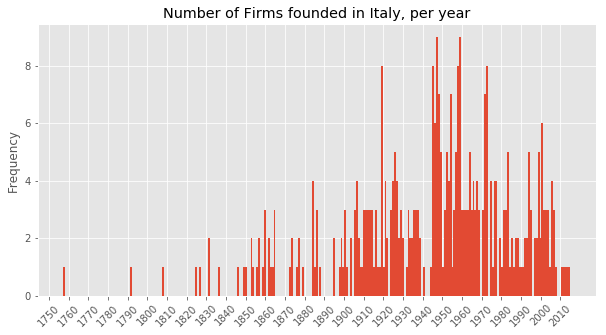

In [24]:
## For the rest of the firms, this the histogram of foundation years

selection = scraped_df[scraped_df.foundation_year > 1750]

selection.foundation_year.plot(kind='hist', 
                               bins=265, 
                               rot=45,  
                               figsize=(10,5), 
                               title='Number of Firms founded in Italy, per year')

ax = plt.gca()
max_value = selection.foundation_year.max()
min_value = 1750
number_of_steps = 10
l = np.arange(min_value, max_value+1, number_of_steps)
ax.set(xticks=l, xticklabels=l)
## save figure to be used in the presentation
plt.savefig('../presentation/figures/foundation_years.png', dpi=200)
plt.show()


In [25]:
## Let us now see how firms are distributed in across industries

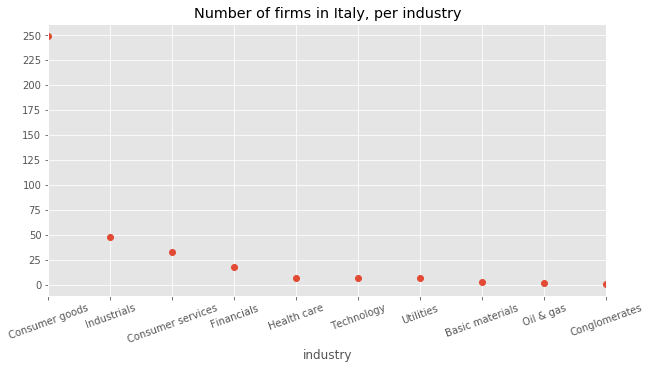

In [26]:

scraped_df.groupby('industry').text.agg({'number_of_firms' : 'count' }).sort_values(
    by='number_of_firms', ascending=False).plot(rot=20,
    yticks = range(0,275,25),
    ls = 'None',
    marker = 'o',
    legend = False,
    figsize=(10,5),
    title='Number of firms in Italy, per industry')

## save figure to be used in the presentation
plt.savefig('../presentation/figures/per_industry.png', dpi=200)

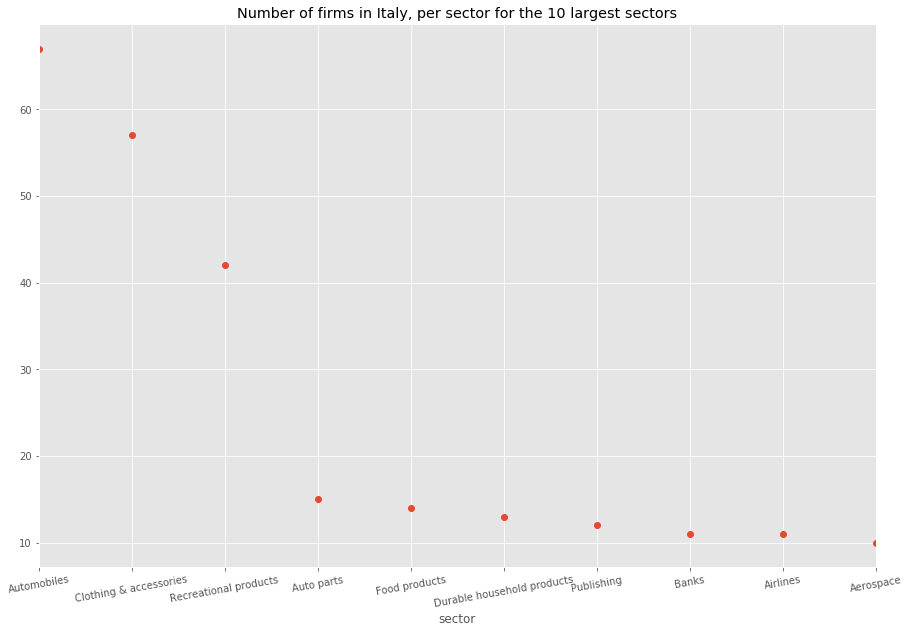

In [27]:
## The distribution of firms across sectors for the 10 largest sectors

selection = scraped_df.groupby(
    'sector').text.agg({'number_of_firms' : 'count' }).sort_values(
    by='number_of_firms', ascending=False)[:10]


selection.plot(
            rot=10,
            ls = 'None',
            marker = 'o',
            legend = False,
            figsize=(15,10),
            title='Number of firms in Italy, per sector for the 10 largest sectors')

## save figure to be used in the presentation
plt.savefig('../presentation/figures/per_sector.png', dpi=200) 


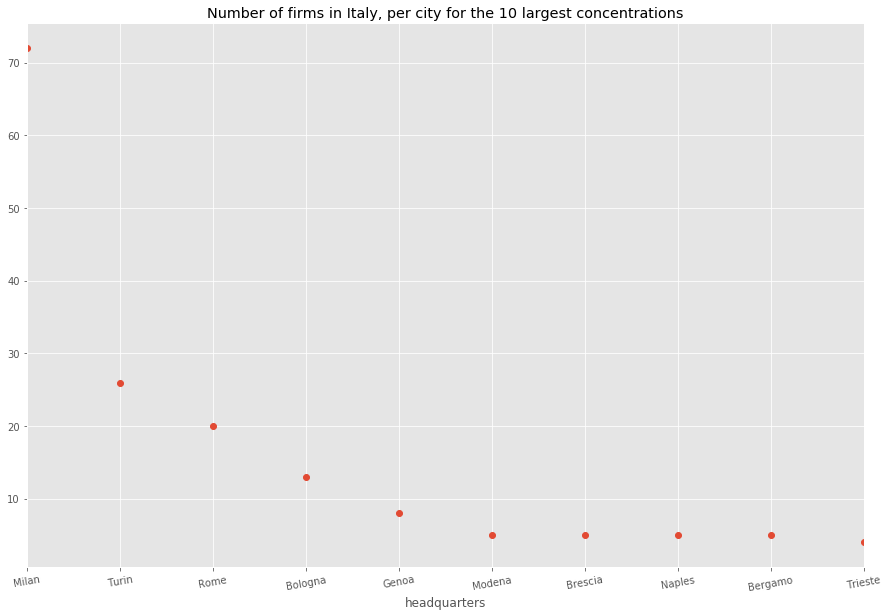

In [28]:
## The distibution of firms across cities, for the 10 largest concentrations

selection = scraped_df.groupby(
    'headquarters').text.agg({'number_of_firms' : 'count' }).sort_values(
    by='number_of_firms', ascending=False)[:10]


selection.plot(
            rot=10,
            ls = 'None',
            marker = 'o',
            legend = False,
            figsize=(10,5),
            title='Number of firms in Italy, per city for the 10 largest concentrations')

## save figure to be used in the presentation
plt.savefig('../presentation/figures/per_city.png', dpi=200) 

In [29]:
## For the four cities with the most firms, 
## we give the break down to industries, for each city

selection = scraped_df[scraped_df.headquarters.isin( 
    ['Milan', 'Turin', 'Rome', 'Bologna']) ]
pd.crosstab(selection.headquarters, selection.industry)

industry,Basic materials,Conglomerates,Consumer goods,Consumer services,Financials,Health care,Industrials,Oil & gas,Utilities
headquarters,,,,,,,,,
Bologna,0,0,9,1,1,0,1,0,1
Milan,1,1,43,13,6,2,5,0,1
Rome,0,0,4,4,2,1,7,1,1
Turin,0,0,20,0,2,0,4,0,0


#### Now it is time to move to the analysis of the text we have collected

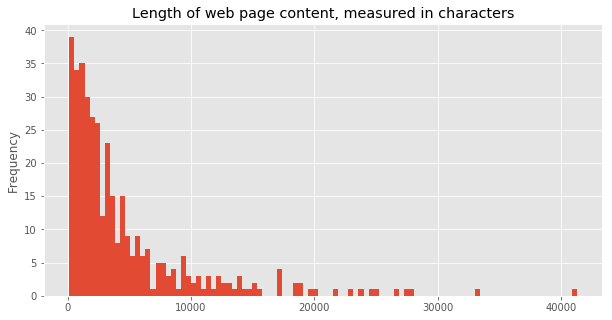

In [30]:
## We first have to notice that not all web pages has significant content
scraped_df.text.apply(lambda x: len(x)).plot(
    kind='hist', 
    bins=100,
    figsize = (10,5),
    title='Length of web page content, measured in characters')

In [31]:
## We keep almost half of the observations; the half with the most text

selection = scraped_df[scraped_df.text.apply(lambda x: len(x)) > 3000]

In [32]:
## We then create two lists, one with the text and another with the names of the firms.

text_list = selection.text.to_list()
name_list = selection.company_name.to_list()

In [33]:
name_list[-1]

'Carrozzeria Ghia'

In [34]:
text_list[-1][:100]

'Carrozzeria Ghia SpA (established 1916 in Turin) is an Italian automobile design and coachbuilding f'

In [35]:
## Now we get to an important part of the process. 
## We transform the text into numerical vectors.
## We remove simple common words that do not carry meaning,
## and trim the rest to their stems

In [36]:
# load nltk's stopwords : a, and, the, etc.
stopwords = nltk.corpus.stopwords.words('english')
print (stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [37]:
# then load the stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [38]:
# here we define a tokenizer and stemmer which returns 
## the set of stems in the text that it is passed

def tokenize_and_stem(text):
    ## first tokenize by sentence, then by word to ensure 
    ## that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    ## filter out any tokens not containing letters 
    ## (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [39]:
## tf_idf is the way in which we transform the text into numerical features. 
## The rows of the matrix represent documents, while the columns represent
## the words that remained after tokenising and stemming. Each word might 
## show up in mulitple documents, and has a different tfidf value each time.

from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(text_list) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 21.9 s, sys: 124 ms, total: 22 s
Wall time: 22.2 s
(172, 344)


In [40]:
## The tfidf_matrix represents each document as a vector 
## in the vector space of all the words in our corpus of documents
## Then it is straight forward to compute the distance between documents, 
## using the available distance metrics. The dist is a square matrix, 
## implemented as a numpy.ndarray.

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

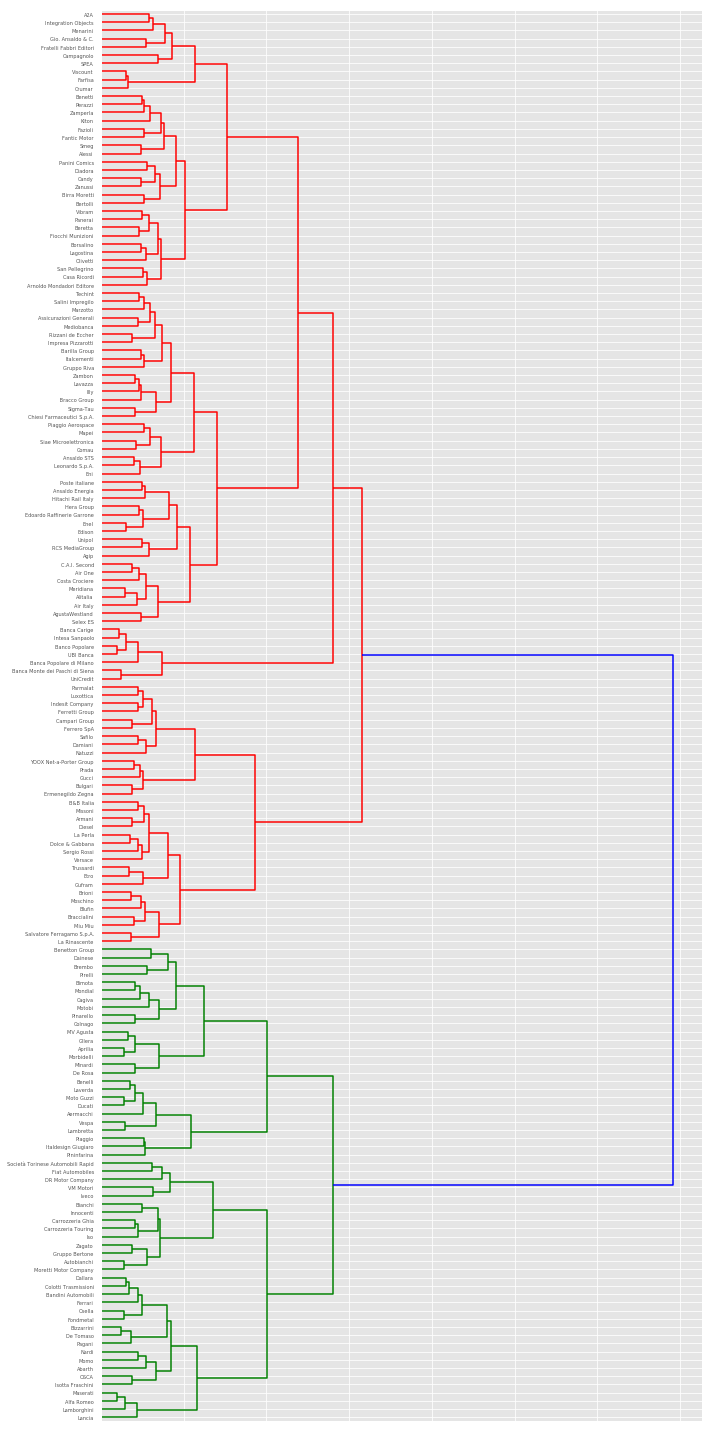

In [41]:
## Once we have the distances we can use an algorithm to create clusters. 
## The one used here is anglomerative, that is, each document starts on its own 
## and then it is united with its closer neighbour, forming a new group, 
## which is in turn united with other groups, until all fall under the same cluster.

from scipy.cluster.hierarchy import ward, dendrogram

## define the linkage_matrix using ward clustering pre-computed distances
linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=name_list);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [42]:
## We would like to see how the clustering went. 
## The cut_tree method cuts the tree so that there will be a certain
## number of clusters left. We set the number to 10

from scipy import cluster
cuttree = cluster.hierarchy.cut_tree(linkage_matrix, n_clusters=[10])

In [43]:
## cuttree array holds numbers from 0 to 9, 
## that correspond to the 10 clusters we asked for

cuttree[:10]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [2],
       [2],
       [2],
       [5],
       [3]])

In [44]:
## In order to see how the clustering went, we add the 'groups' 
## to the rest of the data set. Note that Pandas has kept
## track of the index so that we are sure each 
## position of cuttree corresponds to the correct firm

selection['groups'] = cuttree

In [45]:
## This is then the dataset with our prediction about groups

selection.head(7)

,company_name,foundation_year,headquarters,industry,sector,text,wikipedia_url,groups
102,Carrozzeria Touring,1926,Milan,Consumer goods,Automobiles,Carrozzeria Touring Superleggera is an Italian...,https://en.wikipedia.org/wiki/Carrozzeria_Touring,0
103,Casa Ricordi,1808,Milan,Consumer services,Publishing,Casa Ricordi is a publisher of primarily class...,https://en.wikipedia.org/wiki/Casa_Ricordi,1
108,Chiesi Farmaceutici S.p.A.,1935,Parma,Health care,Pharmaceuticals,Chiesi Farmaceutici S.p.A. is an Italian famil...,https://en.wikipedia.org/wiki/Chiesi_Farmaceut...,2
113,Colnago,1952,Cambiago,Consumer goods,Recreational products,Colnago Ernesto & C. S.r.l. or Colnago is a ma...,https://en.wikipedia.org/wiki/Colnago,3
114,Colotti Trasmissioni,1958,Modena,Consumer goods,Auto parts,Colotti Trasmissioni (Colotti Transmission) is...,https://en.wikipedia.org/wiki/Colotti_Trasmiss...,4
116,Comau,1973,Turin,Industrials,Industrial machinery,Comau (COnsorzio MAcchine Utensili) is an Ital...,https://en.wikipedia.org/wiki/Comau,2
12,Air Italy,2005,Milan,Consumer services,Airlines,Air Italy (registered as AIR ITALY S.p.A.) [2]...,https://en.wikipedia.org/wiki/Air_Italy,2


In [47]:
## Let us finally print the company names for each group

for i in range(10):
    print (selection[['company_name', 'groups']] [selection['groups'] == i])
    print ('\n*****************************************\n')

                          company_name  groups
102                Carrozzeria Touring       0
141                   DR Motor Company       0
171                   Fiat Automobiles       0
195                     Gruppo Bertone       0
206                          Innocenti       0
210                                Iso       0
215                              Iveco       0
265              Moretti Motor Company       0
341  Società Torinese Automobili Rapid       0
36                         Autobianchi       0
367                          VM Motori       0
372                             Zagato       0
58                             Bianchi       0
99                    Carrozzeria Ghia       0

*****************************************

                  company_name  groups
103               Casa Ricordi       1
138                    Diadora       1
162               Fantic Motor       1
164                    Fazioli       1
17                      Alessi       1
173          Fioc